In [1]:
!pip install -U sentence-transformers

     |████████████████████████████████| 79 kB 4.9 MB/s 
     |████████████████████████████████| 4.0 MB 15.5 MB/s 
     |████████████████████████████████| 1.2 MB 50.4 MB/s 
     |████████████████████████████████| 77 kB 8.1 MB/s 
     |████████████████████████████████| 6.5 MB 50.6 MB/s 
     |████████████████████████████████| 895 kB 76.6 MB/s 
     |████████████████████████████████| 596 kB 58.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=8d5ab8a7b22c00d8bbe7a22e45dc39d465c282f75fbabff72887544e541bf571
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from sentence_transformers import SentenceTransformer 
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [3]:
!nvidia-smi

Mon Apr 11 19:39:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/EECS498FinalProj/data

In [ ]:
ls

archive.zip   glove.6B.50d.txt  uiuc.csv  UTAustin.csv
berkeley.csv  nyu.csv           uofm.csv  uwaterloo.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [ ]:
df = pd.read_csv("berkeley.csv")

In [ ]:
df.head()

,Title,Text,Timestamp,Upvotes,Upvote_ratio,Num_comments,Nsfw,Text_Only,Subreddit,Url
0,Looking for: Beach House Tickets,Is anyone trying to unload their Beach House t...,1.648807e+09,0,0.33,1,False,True,berkeley,https://www.reddit.com/r/berkeley/comments/ttm...
1,Dropped a CS interview at the last minute,I had been selected to interview this morning ...,1.648798e+09,68,0.97,15,False,True,berkeley,https://www.reddit.com/r/berkeley/comments/ttl...
2,⚠️⚠️⚠️ Cal Not Accepting Junior Transfers duri...,Hey guys so I heard that Cal won’t be acceptin...,1.648797e+09,0,0.32,2,False,True,berkeley,https://www.reddit.com/r/berkeley/comments/ttk...
3,Doggo,NaN,1.648797e+09,38,0.90,6,False,True,berkeley,https://www.reddit.com/r/berkeley/comments/ttk...
4,Contemplating not committing to UC Berkeley ov...,I have some other options which are arguably n...,1.648797e+09,11,0.70,27,False,True,berkeley,https://www.reddit.com/r/berkeley/comments/ttk...


In [ ]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def concatenate(df):
	df["Content"] = df["Text"].fillna(" ",inplace = True)
	df["Content"] = df["Text"].astype(str) + " "+ df["Title"].astype(str)
	return df

# 2.1 (3 pts.) 
def lowerCase(df):
	df = concatenate(df)
	df["Content"] = df["Content"].str.lower()
	return df

def  clean_text(df):
    df["Content"] = df["Content"].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", str(elem) ))  
    # remove numbers
    df["Content"] = df["Content"].apply(lambda elem: re.sub(r"\d+", "", elem))
    return df

# 2.2 (3 pts.) 
def tokenizeDF(df):
	df["Content"] = df["Content"].map(lambda elem: word_tokenize(str(elem)))
	return df

def lemmatize(df):
    def lemmatize_helper(text):
        return [WordNetLemmatizer().lemmatize(i) for i in text]
    df["Content"] = df["Content"].apply(lambda elem: lemmatize_helper(elem))
    return df

# 2.3 (4 pts.) 	
def removeStop(df, stopeng):
	df["Content"] = df["Content"].map(lambda x: [word for word in x if word not in (stopeng)])
	return df


# 2.4 (4 pts.) 
def keepAlpha(df):
	alpahbets = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
	def keepAlpha_helper(a):
		data_list=[]
		for word in a:
			if len(word) == 0 or len(word) == 1:
				continue
			hasChar = False
			for character in word:
				if character in alpahbets:
					hasChar = True
			if hasChar:
				data_list.append(word)
		return data_list	
	df["Content"] = df["Content"].map(lambda x: keepAlpha_helper(x))
	return df

# 2.5 (3 pts.) 
def joinText(df):
	df["Content"] = df["Content"].map(lambda x: ' '.join(x))
	return df

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("wordnet")
df = lowerCase(df)
df = clean_text(df)
df = tokenizeDF(df)
df = lemmatize(df)
stopeng = set(stopwords.words("english"))
df = removeStop(df,stopeng)
df = keepAlpha(df)
df = joinText(df)

In [ ]:
def sentence_embedding(df):
  df["Text_embedding"] = df["Content"].map(lambda text: model.encode(str(text)))
  return df

In [ ]:
df = sentence_embedding(df)

In [ ]:
df.to_csv("cleaned_berkely.csv")

In [ ]:
import math
def cal_votes(Upvotes,Upvote_ratio):
    if Upvote_ratio == 0.5:
      return 0
    if Upvote_ratio < 0.5:
        upvotes = 11
        downvotes = 11
    else:
        upvotes = math.floor(Upvotes/(2-1/Upvote_ratio))
        downvotes = upvotes - Upvotes
    return upvotes+downvotes
df["num_votes"] = df[["Upvotes","Upvote_ratio"]].apply(lambda x: cal_votes(x['Upvotes'],x["Upvote_ratio"]),axis=1)

In [ ]:
X = df["Text_embedding"][df["num_votes"]>20][:5000]
X.head()

(array([  13.,    2.,    3.,    6.,    6.,    7.,   22.,   26.,   21.,
          36.,   51.,   58.,   68.,   70.,   74.,   77.,  109.,  105.,
         122.,  109.,  122.,  227.,  195.,  185.,  184.,  225.,  234.,
         230.,  236.,  367.,  346.,  342.,  366.,  343.,  363.,  365.,
         463.,  310.,  324.,  391.,  410.,  352.,  363.,  396.,  238.,
         227.,  224.,  156.,  106.,   80.,   53.,   57.,   44.,   54.,
          49.,   67.,   74.,   52.,   67.,   64.,   75.,   71.,   76.,
          67.,   90.,   70.,   76.,  115.,  104.,  113.,  106.,  121.,
         126.,  144.,  136.,  182.,  166.,  216.,  248.,  223.,  260.,
         298.,  316.,  310.,  362.,  419.,  470.,  519.,  556.,  608.,
         658.,  738.,  810.,  900.,  957.,  853.,  992., 1034., 1051.,
        1430.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

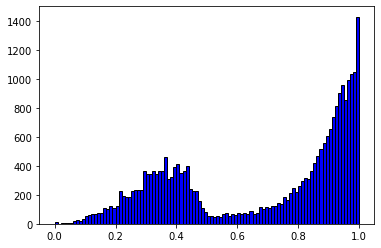

In [ ]:
import random
def modify_ratio(x):
  sign = random.randint(0,1)*2-1
  val = random.random()*0.04
  val = sign*val+x
  if val <0:
    val = x
  if val > 1:
    val = x
  return round(val,3)
df["modified_ratio"]=df["Upvote_ratio"].apply(lambda x: modify_ratio(x))
plt.hist( df["modified_ratio"][df["num_votes"]>20], color = 'blue', edgecolor = 'black',
         bins = 100)

In [ ]:
y = df["modified_ratio"][df["num_votes"]>20]
y.value_counts()

0.990    92
0.980    88
1.000    83
0.970    52
0.944    32
         ..
0.081     1
0.479     1
0.176     1
0.677     1
0.557     1
Name: modified_ratio, Length: 777, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet50,VGG19,MobileNetV2, EfficientNetB6
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
s1 = pd.Series(y_test)
s2 = pd.Series(X_test)
s = pd.concat([s2,s1],axis=1)
print(s[s["modified_ratio"] < 0.1].shape[0])
print(s[s["modified_ratio"] >= 0.1][s["modified_ratio"] < 0.2].shape[0])
print(s[s["modified_ratio"] >= 0.2][s["modified_ratio"] < 0.3].shape[0])
print(s[s["modified_ratio"] >= 0.3][s["modified_ratio"] < 0.4].shape[0])
print(s[s["modified_ratio"] >= 0.4][s["modified_ratio"] < 0.5].shape[0])
print(s[s["modified_ratio"] >= 0.5][s["modified_ratio"] < 0.6].shape[0])
print(s[s["modified_ratio"] >= 0.6][s["modified_ratio"] < 0.7].shape[0])
print(s[s["modified_ratio"] >= 0.7][s["modified_ratio"] < 0.8].shape[0])
print(s[s["modified_ratio"] >= 0.8][s["modified_ratio"] < 0.9].shape[0])
print(s[s["modified_ratio"] >= 0.9][s["modified_ratio"] < 1].shape[0])

s0=s[s["modified_ratio"] < 0.1][:25]
s1=s[s["modified_ratio"] >= 0.1][s["modified_ratio"] < 0.2][:100]
s2=s[s["modified_ratio"] >= 0.2][s["modified_ratio"] < 0.3][:100]
s3=s[s["modified_ratio"] >= 0.3][s["modified_ratio"] < 0.4][:100]
s4=s[s["modified_ratio"] >= 0.4][s["modified_ratio"] < 0.5][:100]
s5=s[s["modified_ratio"] >= 0.5][s["modified_ratio"] < 0.6][:100]
s6=s[s["modified_ratio"] >= 0.6][s["modified_ratio"] < 0.7][:100]
s7=s[s["modified_ratio"] >= 0.7][s["modified_ratio"] < 0.8][:100]
s8=s[s["modified_ratio"] >= 0.8][s["modified_ratio"] < 0.9][:100]
s9=s[s["modified_ratio"] >= 0.9][s["modified_ratio"] < 1][:100]

ss = pd.concat([s0,s1,s2,s3,s4,s5,s6,s7,s8,s9],axis=0)
X_test = ss["Text_embedding"]
y_test = ss["modified_ratio"]
X_test = tf.convert_to_tensor(list(X_test))
print(ss)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
s1 = pd.Series(y_train)
s2 = pd.Series(X_train)
s = pd.concat([s2,s1],axis=1)
print(s[s["modified_ratio"] < 0.1].shape[0])
print(s[s["modified_ratio"] >= 0.1][s["modified_ratio"] < 0.2].shape[0])
print(s[s["modified_ratio"] >= 0.2][s["modified_ratio"] < 0.3].shape[0])
print(s[s["modified_ratio"] >= 0.3][s["modified_ratio"] < 0.4].shape[0])
print(s[s["modified_ratio"] >= 0.4][s["modified_ratio"] < 0.5].shape[0])
print(s[s["modified_ratio"] >= 0.5][s["modified_ratio"] < 0.6].shape[0])
print(s[s["modified_ratio"] >= 0.6][s["modified_ratio"] < 0.7].shape[0])
print(s[s["modified_ratio"] >= 0.7][s["modified_ratio"] < 0.8].shape[0])
print(s[s["modified_ratio"] >= 0.8][s["modified_ratio"] < 0.9].shape[0])
print(s[s["modified_ratio"] >= 0.9][s["modified_ratio"] < 1].shape[0])

# s0=s[s["modified_ratio"] < 0.1][:25]
s1=s[s["modified_ratio"] >= 0.1][s["modified_ratio"] < 0.2][:400]
s2=s[s["modified_ratio"] >= 0.2][s["modified_ratio"] < 0.3][:400]
s3=s[s["modified_ratio"] >= 0.3][s["modified_ratio"] < 0.4][:400]
s4=s[s["modified_ratio"] >= 0.4][s["modified_ratio"] < 0.5][:400]
s5=s[s["modified_ratio"] >= 0.5][s["modified_ratio"] < 0.6][:400]
s6=s[s["modified_ratio"] >= 0.6][s["modified_ratio"] < 0.7][:400]
s7=s[s["modified_ratio"] >= 0.7][s["modified_ratio"] < 0.8][:400]
s8=s[s["modified_ratio"] >= 0.8][s["modified_ratio"] < 0.9][:400]
s9=s[s["modified_ratio"] >= 0.9][s["modified_ratio"] < 1][:400]

ss = pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9],axis=0)
X_train = ss["Text_embedding"]
y_train = ss["modified_ratio"]
X_train = tf.convert_to_tensor(list(X_train))
print(y_train)

In [ ]:
X_train = tf.convert_to_tensor(list(X_train))
X_test = tf.convert_to_tensor(list(X_test))

In [ ]:
NN_model = Sequential()
ker_init = "normal"
# The Input Layer :
NN_model.add(Dense(512, kernel_initializer=ker_init,input_dim = X_train.shape[1], activation='relu'))
NN_model.add(Dropout(0.4))
# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer=ker_init,activation='relu'))
NN_model.add(Dropout(0.4))
NN_model.add(Dense(256, kernel_initializer=ker_init,activation='relu'))
NN_model.add(Dropout(0.4))
NN_model.add(Dense(128, kernel_initializer=ker_init,activation='relu'))
NN_model.add(Dropout(0.4))
NN_model.add(Dense(64, kernel_initializer=ker_init,activation='relu'))
NN_model.add(Dense(32, kernel_initializer=ker_init,activation='relu'))
NN_model.add(Dense(16, kernel_initializer=ker_init,activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer=ker_init,activation='sigmoid'))

NN_model.compile(loss=custom_loss, optimizer=Adam(0.0001), metrics=["mae"])
NN_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 512)               197120    
                                                                 
 dropout_24 (Dropout)        (None, 512)               0         
                                                                 
 dense_49 (Dense)            (None, 256)               131328    
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_50 (Dense)            (None, 256)               65792     
                                                                 
 dropout_26 (Dropout)        (None, 256)               0         
                                                                 
 dense_51 (Dense)            (None, 128)              

In [ ]:
!rm my_*

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
from sklearn.neighbors import KernelDensity

In [ ]:
dmm = KernelDensity(bandwidth=0.03, kernel='gaussian')
sample = np.array(y_train)
sample = sample.reshape((sample.shape[0],1))
dmm.fit(sample)

KernelDensity(bandwidth=0.03)

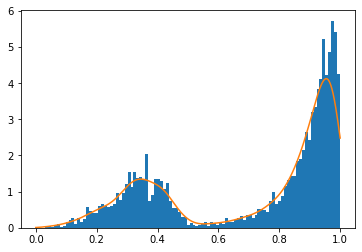

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sample,bins=100,density=True)
values = np.linspace(0, 1, num=1000)
values = values.reshape((len(values), 1))
p = np.exp(dmm.score_samples(values))
plt.plot(values,p)

In [ ]:
checkpoint_name = 'my_best_model.epoch{epoch:03d}-loss{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
NN_model.fit(X_train, y_train, epochs=60, batch_size=512, validation_split = 0.2,callbacks=callbacks_list)

In [ ]:
wights_file = "my_best_model.epoch054-loss0.17912.hdf5"
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mae', optimizer='adam', metrics=['mae'])
predictions = NN_model.predict(X_test)

In [ ]:
NN_model.evaluate(X_test,y_test)

163/163 [==============================] - 1s 2ms/step - loss: 0.1783 - mae: 0.1783


[0.17831486463546753, 0.17831486463546753]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pred = predictions.reshape((predictions.shape[0]))
yy = list(y_test)
# plt.plot(range(1,101),dif[:100],".-")
# plt.plot(range(1,101),y_test[:100],".-")

In [ ]:
dif = pred-yy

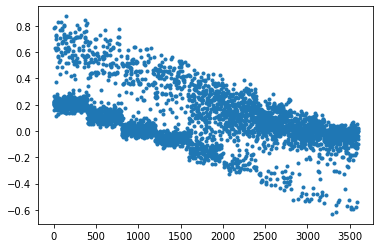

In [ ]:
plt.plot(dif,'.')

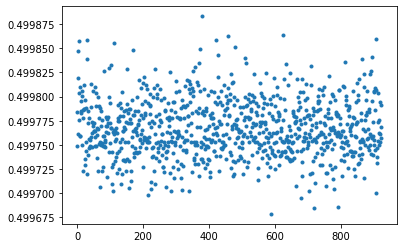

In [ ]:
plt.plot(pred,'.')

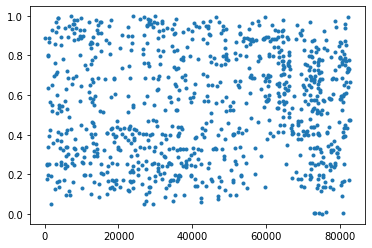

In [ ]:
plt.plot(y_test,'.')

In [ ]:
a = df.sample(10000,random_state=42)
y = a["Upvote_ratio"]
y.value_counts()

1.00    2197
0.50     722
0.67     581
0.75     447
0.60     312
        ... 
0.00       2
0.07       2
0.09       2
0.08       2
0.04       1
Name: Upvote_ratio, Length: 97, dtype: int64

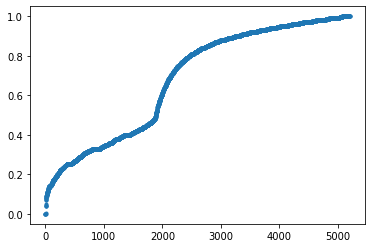

In [ ]:
y_sort = sorted(yy)
plt.plot(range(len(y_sort)),y_sort,'.')

In [ ]:
import random
def modify_ratio(x):
  sign = random.randint(0,1)*2-1
  val = random.random()*0.01
  val = sign*val+x
  if val <0:
    val = x
  if val > 1:
    val = x
  return round(val,3)
df["modified_ratio"]=df["Upvote_ratio"].apply(lambda x: modify_ratio(x))


In [ ]:
y = df["modified_ratio"][df["modified_ratio"]<1]
y.head()

0    0.335
1    0.967
2    0.310
3    0.893
4    0.700
Name: modified_ratio, dtype: float64

In [ ]:
df["Upvote_ratio"].head()

0    0.33
1    0.97
2    0.32
3    0.90
4    0.70
Name: Upvote_ratio, dtype: float64

(array([  1.,   1.,   2.,   2.,   2.,   5.,   3.,   3.,   9.,   9.,  13.,
         15.,  14.,  15.,  16.,  19.,  17.,  20.,  17.,  19.,  36.,  39.,
         39.,  33.,  48.,  42.,  31.,  25.,  48.,  98.,  74.,  65.,  98.,
        105.,  28.,  32.,  66.,  54.,  63.,  75.,  69.,  38.,  38.,  44.,
         30.,  21.,  13.,  10.,   5.,   7.,   3.,   4.,   3.,   7.,   5.,
          4.,   7.,   6.,  11.,   5.,   3.,  14.,  12.,   5.,  12.,   9.,
         18.,  16.,  13.,  12.,  15.,  14.,  18.,  30.,  34.,  20.,  34.,
         39.,  40.,  24.,  36.,  57.,  58.,  60.,  73.,  77.,  94., 106.,
        118., 134., 151., 174., 183., 215., 211., 221., 272., 265., 272.,
        210.]),
 array([0.025  , 0.03475, 0.0445 , 0.05425, 0.064  , 0.07375, 0.0835 ,
        0.09325, 0.103  , 0.11275, 0.1225 , 0.13225, 0.142  , 0.15175,
        0.1615 , 0.17125, 0.181  , 0.19075, 0.2005 , 0.21025, 0.22   ,
        0.22975, 0.2395 , 0.24925, 0.259  , 0.26875, 0.2785 , 0.28825,
        0.298  , 0.30775, 0.3175 ,

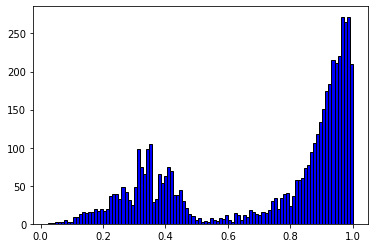

In [ ]:
plt.hist(y, color = 'blue', edgecolor = 'black',
         bins = 100)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   4.,  13.,  10.,
         45.,  73., 137., 202., 208., 214., 154., 115.,  89.,  58.,  47.,
         24.,  22.,   7.,  17.,  13.,  12.,   8.,   9.,  13.,  25.,  11.,
         12.,  12.,  15.,  11.,  14.,  13.,  11.,  18.,  13., 166.,  17.,
         21.,  21.,  14.,  21.,  28.,  32.,  35.,  31.,  43.,  58.,  66.,
         68.,  79.,  74.,  99.,  97., 120., 115., 112., 142., 152., 154.,
        160., 149., 167., 170., 159., 163., 188., 195., 165., 148.,  87.,
         35.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

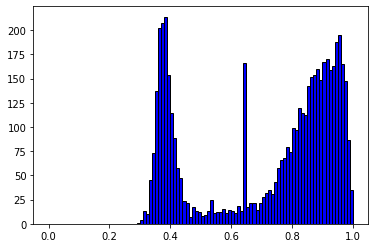

In [ ]:
plt.hist(pred, color = 'blue', edgecolor = 'black', range=[0, 1],
         bins = 100)

(array([  6.,   0.,   0.,   0.,   2.,   0.,   3.,   2.,   5.,   8.,   5.,
          7.,  10.,  25.,  28.,   8.,  27.,  35.,  10.,  26.,  33.,  22.,
         17.,  17., 100.,  91.,  39.,  26.,  37.,  52.,  29.,  25., 171.,
        182.,  28.,  44.,  28.,  52.,  55., 132., 155.,  24.,  56.,  83.,
         63.,  36.,  41.,  28.,  12.,   3.,   4.,  12.,  11.,   6.,   7.,
          9.,  16.,   8.,  12.,  14.,  21.,   6.,   8.,  16.,  11.,  18.,
         18.,  18.,  28.,  21.,  15.,  31.,  17.,  34.,  22.,  37.,  39.,
         37.,  41.,  48.,  42.,  63.,  52.,  55.,  66.,  74.,  87.,  88.,
        125., 131., 119., 157., 163., 173., 179., 188., 216., 242., 214.,
        294.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

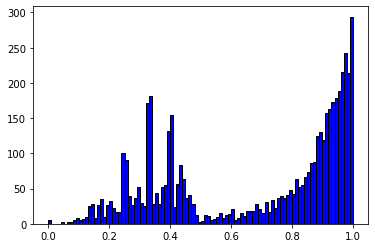

In [ ]:
plt.hist(y_test, color = 'blue', edgecolor = 'black',range=[0, 1],
         bins = 100)

Pytorch

In [ ]:
import os, time, random
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.utils.data as data_utils

In [ ]:
batch_size = 256

In [ ]:
X = df["Text_embedding"][df["num_votes"]>20][:5000]
X

0        [-0.04301166, -0.1287621, -0.29851002, -0.0169...
1        [0.04479128, 0.08691478, 0.22561264, 0.0892585...
2        [0.2537218, -0.68383133, 0.44392714, 0.0871107...
3        [0.12569249, -0.21759912, 0.013539232, -0.0442...
4        [0.05793921, 0.21838894, -0.0147990165, -0.323...
                               ...                        
15127    [0.27917302, 0.08691521, 0.44973958, 0.0814223...
15128    [0.15581521, 0.33700973, 0.23474352, -0.019493...
15129    [-0.29935658, 0.05939319, -0.1119916, -0.08325...
15139    [-0.16162644, 0.17903079, -0.1824501, -0.75724...
15143    [0.034605987, 0.5103133, -0.13331512, 0.153734...
Name: Text_embedding, Length: 5000, dtype: object

In [ ]:
def to_class(x):
  return math.ceil(x*10)
  if x <= 0.3:
    return 0
  elif x > 0.3 and x <=0.65:
    return 1
  elif x > 0.65:
    return 2

y = df["Upvote_ratio"][df["num_votes"]>20][:100].apply(lambda x: to_class(x))
# y[y < 2] = 2
# y = y-2
y.value_counts()

10    34
4     27
9     13
3      9
8      6
2      4
7      3
5      3
1      1
Name: Upvote_ratio, dtype: int64

In [ ]:
y = df["modified_ratio"][df["num_votes"]>20][:5000]
y.value_counts()

0.990    83
1.000    77
0.980    57
0.970    40
0.961    34
         ..
0.095     1
0.102     1
0.516     1
0.195     1
0.587     1
Name: modified_ratio, Length: 773, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
y_train.value_counts()

0.990    66
1.000    62
0.980    50
0.970    30
0.961    27
         ..
0.195     1
0.715     1
0.074     1
0.687     1
0.103     1
Name: modified_ratio, Length: 732, dtype: int64

In [ ]:
X_train = np.vstack(X_train).astype(np.float32)
X_test = np.vstack(X_test).astype(np.float32)
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test.values.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.float32))
# torch.tensor(s1.values.astype(np.float32))

In [ ]:
train_tensor = data_utils.TensorDataset(X_train, y_train) 
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)
test_tensor = data_utils.TensorDataset(X_test, y_test) 
test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = batch_size, shuffle = True)

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=input_size, out_features=512, bias=True),
            # nn.BatchNorm1d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 
            nn.ReLU(inplace=True), 
            nn.Dropout(p=0.3, inplace=False),
            nn.Linear(in_features=512, out_features=256, bias=True),
            # nn.BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),  
            nn.ReLU(inplace=True), 
            nn.Dropout(p=0.2, inplace=False), 
            nn.Linear(in_features=256, out_features=128, bias=True),
            # nn.BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),  
            nn.ReLU(inplace=True), 
            nn.Dropout(p=0.2, inplace=False), 
            nn.Linear(in_features=128, out_features=64, bias=True),
            # nn.BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),  
            nn.ReLU(inplace=True), 
            nn.Dropout(p=0.2, inplace=False), 
            nn.Linear(in_features=64, out_features=1, bias=True),
        )
    
    def forward(self, x):
        z1 = self.classifier(x)
        # z = torch.softmax(z1,dim=1)
        # zz = torch.argmax(z,dim=1)
        z = torch.sigmoid(z1)
        # print(zz)
        return z

In [ ]:
def custom_loss(y_actual,y_pred,dmm):
  y_actual = y_actual.reshape((-1,1))
  # print(y_actual-y_pred)
  absolute_error = torch.abs((y_actual - y_pred))
  # return torch.mean(absolute_error)
  # print(absolute_error.shape,y_actual.shape)
  p = torch.Tensor(dmm.score_samples(y_actual)).reshape((-1,1))
  tot = torch.sum(p)
  p = y_actual.shape[0]*p/tot
  # print(p)

  return torch.mean(torch.div(absolute_error,p))

In [ ]:
def _train_epoch(data_loader, model, criterion, optimizer):
    """
    Train the `model` for one epoch of data from `data_loader`
    Use `optimizer` to optimize the specified `criterion`
    """
    model.train()
    for i, (X, y) in enumerate(data_loader):
        # clear parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(X)
        loss = custom_loss(y, output,dmm)
        loss.backward()
        
        optimizer.step()

def _evaluate_epoch(tr_loader, va_loader, model, criterion):
    model.eval()
    with torch.no_grad():
        # Evaluate on train
        y_true, y_pred = [], []
        running_loss = []
        for X, y in tr_loader:
            output = model(X)
            y_true.append(y.detach().numpy())
            y_pred.append(output)
            running_loss.append(custom_loss(y, output,dmm))
        y_true, y_pred = np.concatenate(y_true), np.concatenate(y_pred)
        train_loss = np.mean(running_loss)

        train_mae = np.mean(np.abs(y_true.reshape((-1,1))-y_pred))
        # train_score = metrics.roc_auc_score(y_true, y_score)
        print("train_loss: %.5f, train_mae: %.5f"%(train_loss,train_mae))

        # Evaluate on validation
        y_true, y_pred = [], []
        running_loss = []
        for X, y in va_loader:
            output = model(X)
            y_true.append(y.detach().numpy())
            y_pred.append(output)
            running_loss.append(custom_loss(y, output,dmm))

        y_true, y_pred = np.concatenate(y_true), np.concatenate(y_pred)
        val_loss = np.mean(running_loss)
        val_mae = np.mean(np.abs(y_true.reshape((-1,1))-y_pred))
        print("val_loss: %.5f, val_mae: %.5f"%(val_loss,val_mae))
    return train_loss, val_loss, train_mae, val_mae

def save_checkpoint(model, epoch, checkpoint_dir):
    state = {
        'epoch': epoch,
        'state_dict': model.state_dict(),
    }

    # filename = os.path.join(checkpoint_dir, 'epoch={}.checkpoint.pth'.format(epoch))
    torch.save(state, 'checkpoint_dir5000_003_004/epoch={}.checkpoint.pth'.format(epoch))

In [ ]:
model = Model(384, 1)

In [ ]:
!mkdir checkpoint_dir

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


Epoch 0
train_loss: 0.08111, train_mae: 0.33268
val_loss: 0.02058, val_mae: 0.33440
Epoch 1
train_loss: 0.09468, train_mae: 0.33196
val_loss: 0.00382, val_mae: 0.33366
Epoch 2
train_loss: 0.08847, train_mae: 0.33131
val_loss: -0.00788, val_mae: 0.33300
Epoch 3
train_loss: 0.09155, train_mae: 0.33046
val_loss: 0.00485, val_mae: 0.33211
Epoch 4
train_loss: 0.08123, train_mae: 0.32874
val_loss: -0.00085, val_mae: 0.33032
Epoch 5
train_loss: 0.07533, train_mae: 0.32634
val_loss: -0.00225, val_mae: 0.32784
Epoch 6
train_loss: 0.06588, train_mae: 0.32342
val_loss: -0.01100, val_mae: 0.32481
Epoch 7
train_loss: 0.06018, train_mae: 0.31739
val_loss: -0.01311, val_mae: 0.31851
Epoch 8
train_loss: 0.03607, train_mae: 0.30837
val_loss: -0.03549, val_mae: 0.30912
Epoch 9
train_loss: 0.01069, train_mae: 0.29613
val_loss: -0.04228, val_mae: 0.29650
Epoch 10
train_loss: -0.01967, train_mae: 0.28367
val_loss: -0.04626, val_mae: 0.28341
Epoch 11
train_loss: -0.09199, train_mae: 0.26068
val_loss: -0.073

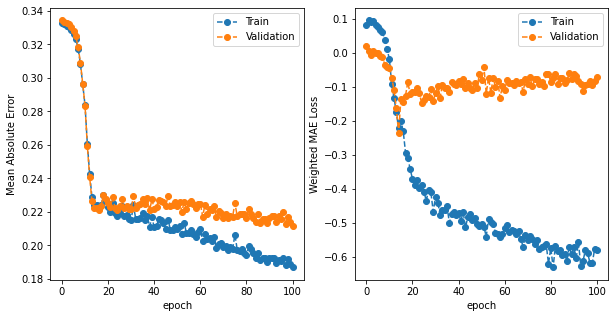

In [ ]:
import os, time, random
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from matplotlib import pyplot as plt

device = torch.device("cuda:0")
n_epochs = 100
learning_rate = 1e-4


# print('Number of float-valued parameters:', count_parameters(model))

criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

outputs = []

# model = model.cuda()

print('Epoch', 0)
out = _evaluate_epoch(train_loader, test_loader, model, criterion)
outputs.append(out)

for epoch in range(0, n_epochs):
    print('Epoch', epoch+1)
    # Train model
    _train_epoch(train_loader, model, criterion, optimizer)

    # Evaluate model
    out = _evaluate_epoch(train_loader, test_loader, model, criterion)
    outputs.append(out)
    
    # Save model parameters
    save_checkpoint(model, epoch+1, 'checkpoint/')

train_losses, val_losses, train_acces, val_acces = zip(*outputs)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(range(n_epochs + 1), train_acces, '--o', label='Train')
ax[0].plot(range(n_epochs + 1), val_acces, '--o', label='Validation')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].legend()

ax[1].plot(range(n_epochs + 1), train_losses, '--o', label='Train')
ax[1].plot(range(n_epochs + 1), val_losses, '--o', label='Validation')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('Weighted MAE Loss')
ax[1].legend()

plt.savefig('train_plot.png', dpi=300)


In [ ]:
ls

archive.zip      cleaned_berkeley.csv  Showerthoughts.csv  uofm.csv
berkeley.csv     glove.6B.50d.txt      train_plot.png      UTAustin.csv
checkpoint_dir/  nyu.csv               uiuc.csv            uwaterloo.csv


In [ ]:
model.eval()
with torch.no_grad():
  y_true=[]
  y_score=[]
  running_loss = []
  for X, y in test_loader:
    output = model(X)
    y_true.append(y.numpy())
    y_score.append(output)
    running_loss.append(criterion(output,y.long()).item())

  y_true, y_score = np.concatenate(y_true), np.concatenate(y_score)
  test_loss = np.mean(running_loss)
  y_pred = np.argmax(y_score, axis=1)
  test_acc = np.sum(y_true == y_pred) / len(y_true)

  print("val_loss: %.5f, val_acc: %.5f"%(test_loss,test_acc))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-658-a855b52a7e73>", line 10, in <module>
    running_loss.append(criterion(output,y.long(),weight=class_weights).item())
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
TypeError: forward() got an unexpected keyword argument 'weight'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/p

TypeError: ignored

In [ ]:
mySeries = pd.Series(y_pred) 